Um Estudo sobre otimização evolucionária e extração de conhecimento de fronteiras de Pareto aplicado a um
amplificador operacional de transcondutância
===

Antonio Paulo de Moraes Leme

Orientador: Prof. Dr. Carlos Eduardo Thomaz

2012


In [113]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [114]:
rng = np.random.RandomState(0)

In [115]:
leme_data = pd.read_csv("leme-fronteira.csv", delimiter="\t")

leme_data.head()

,N.,Semente,A_{v0},f_{T},SR,Pwr,Area,I_{pol},V_{pol},"W_{1,2}",...,"W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
0,1,1241,36.65300,0.872680,0.614295,0.004818,4.6197,0.15,0.70,1.64,...,0.50,0.56,1.33,0.50,0.50,0.50,0.61,0.50,0.55,0.52
1,2,1241,36.58270,0.128321,0.095705,0.000736,218.7030,4.69,0.70,1.64,...,14.18,1.66,14.70,0.50,0.79,54.05,12.23,1.47,3.31,15.78
2,3,1241,71.37731,0.161687,0.107571,0.108153,3499.4700,33.92,1.32,99.96,...,16.20,4.75,3.47,88.29,1.07,100.00,30.19,11.53,74.44,27.66
3,4,1241,28.63933,948.150000,2218.060000,33.284500,2772.5000,6.59,1.33,99.98,...,22.53,0.50,100.00,0.50,99.73,0.50,43.89,54.59,99.99,0.54
4,5,1241,21.00357,643.652000,2855.960000,39.775600,279.6130,3.38,1.24,44.83,...,7.81,0.50,100.00,0.50,72.55,0.50,3.48,1.31,99.70,0.50


In [116]:
leme_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   N.       1000 non-null   int64  
 1   Semente  1000 non-null   int64  
 2   A_{v0}   1000 non-null   float64
 3   f_{T}    1000 non-null   float64
 4   SR       1000 non-null   float64
 5   Pwr      1000 non-null   float64
 6   Area     1000 non-null   float64
 7   I_{pol}  1000 non-null   float64
 8   V_{pol}  1000 non-null   float64
 9   W_{1,2}  1000 non-null   float64
 10  L_{1,2}  1000 non-null   float64
 11  W_{3,4}  1000 non-null   float64
 12  L_{3,4}  1000 non-null   float64
 13  W_{5,6}  1000 non-null   float64
 14  L_{5,6}  1000 non-null   float64
 15  W_{7,8}  1000 non-null   float64
 16  L_{7,8}  1000 non-null   float64
 17  W_{9}    1000 non-null   float64
 18  L_{9}    1000 non-null   float64
 19  W_{10}   1000 non-null   float64
 20  L_{10}   1000 non-null   float64
dtypes: float64(19),

In [117]:
leme_data.describe()


,N.,Semente,A_{v0},f_{T},SR,Pwr,Area,I_{pol},V_{pol},"W_{1,2}",...,"W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,1243.000000,39.997736,413.956116,1029.001005,10.919472,7889.224870,13.66913,1.478350,92.132050,...,28.852950,0.791670,95.421480,2.050560,61.112000,13.620920,57.561230,60.502420,97.848860,13.268320
std,288.819436,1.414921,10.182466,327.637837,853.189854,10.684768,8135.433841,18.45457,0.345594,17.889493,...,8.923338,1.238286,19.131711,6.580487,27.738644,23.563017,32.665139,31.343287,12.531828,28.731068
min,1.000000,1241.000000,20.592710,0.097793,0.088643,0.000585,4.619700,0.10000,0.700000,1.510000,...,0.500000,0.500000,1.050000,0.500000,0.500000,0.500000,0.610000,0.500000,0.550000,0.500000
25%,250.750000,1242.000000,32.816243,77.722725,263.616750,1.984368,1505.895000,2.97750,1.280000,95.637500,...,27.722500,0.500000,99.780000,0.500000,37.927500,0.550000,27.682500,39.210000,99.620000,0.510000
50%,500.500000,1243.000000,38.463900,397.747000,832.857000,7.453075,4947.765000,4.02000,1.330000,98.400000,...,30.165000,0.500000,99.980000,0.550000,55.665000,1.300000,63.945000,67.365000,99.910000,0.590000
75%,750.250000,1244.000000,44.684492,738.302500,1728.257500,16.671600,11523.400000,12.56500,1.522500,99.470000,...,31.492500,0.530000,100.000000,1.060000,88.950000,13.585000,89.077500,88.870000,99.980000,4.117500
max,1000.000000,1245.000000,71.377310,949.109000,2904.230000,40.991900,38149.900000,81.26000,2.290000,100.000000,...,75.060000,14.020000,100.000000,88.290000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [118]:
leme_data["Semente"].value_counts()


Semente
1241    200
1242    200
1243    200
1244    200
1245    200
Name: count, dtype: int64

In [119]:
# TODO: train on n - 1 seeds, test on remaining seed.
# goal: try to navigate to points in the unknown frontier
# by regressing the known ones.
leme_data_1241 = leme_data[leme_data["Semente"] == 1241]

leme_data_1241.describe()

,N.,Semente,A_{v0},f_{T},SR,Pwr,Area,I_{pol},V_{pol},"W_{1,2}",...,"W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,200.000000,200.0,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1241.0,36.165546,567.378022,1281.761976,15.889805,4173.679148,5.031750,1.300750,89.953650,...,27.203150,0.625400,96.463600,1.83445,54.109050,6.536600,46.359350,47.051750,98.333800,2.205550
std,57.879185,0.0,9.359521,300.501878,882.637116,11.124077,4762.344171,5.440955,0.095859,21.246918,...,7.698243,0.528467,17.526991,8.55567,25.183642,17.747446,33.429193,28.963584,10.447995,5.432854
min,1.000000,1241.0,21.003570,0.128321,0.095705,0.000736,4.619700,0.130000,0.700000,1.640000,...,0.500000,0.500000,1.330000,0.50000,0.500000,0.500000,0.610000,0.500000,0.550000,0.500000
25%,50.750000,1241.0,30.520020,336.475250,448.254750,6.430710,931.008000,2.890000,1.270000,96.372500,...,26.045000,0.500000,99.850000,0.50000,32.300000,0.510000,18.320000,30.035000,99.890000,0.500000
50%,100.500000,1241.0,34.115195,638.098000,1264.640000,14.250000,2288.390000,3.140000,1.320000,97.920000,...,30.280000,0.500000,99.990000,0.52000,49.330000,0.590000,38.745000,47.035000,99.980000,0.515000
75%,150.250000,1241.0,39.927885,838.830000,2067.615000,24.580475,6105.640000,5.317500,1.330000,99.260000,...,31.080000,0.510000,100.000000,0.79000,73.120000,1.612500,82.115000,76.345000,99.990000,0.600000
max,200.000000,1241.0,71.377310,948.150000,2855.960000,40.450500,26568.300000,33.920000,1.650000,99.980000,...,50.710000,4.750000,100.000000,88.29000,99.780000,100.000000,99.540000,98.640000,100.000000,36.240000


In [227]:
# "N.", "Semente": Não são relevantes para regressão.
X = leme_data[["N.", "Semente", "I_{pol}", "V_{pol}", "W_{1,2}", "L_{1,2}", "W_{3,4}", "L_{3,4}", "W_{5,6}", "L_{5,6}", "W_{7,8}", "L_{7,8}", "W_{9}", "L_{9}", "W_{10}", "L_{10}"]]

# Semente
# 1241    200
# 1242    200
# 1243    200
# 1244    200
# 1245    200
X_train = X[X["Semente"] != 1241]
X_test = X[X["Semente"] == 1241]

X_train = X_train.drop("Semente", axis=1)
X_test = X_test.drop("Semente", axis=1)

X_train.describe()

,N.,I_{pol},V_{pol},"W_{1,2}","L_{1,2}","W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,800.0000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,600.5000,15.828475,1.52275,92.676650,0.534288,29.265400,0.833238,95.160950,2.104588,62.862738,15.392000,60.361700,63.865087,97.727625,16.034012
std,231.0844,19.877230,0.37037,16.918145,0.158628,9.162184,1.356084,19.513897,5.991351,28.084301,24.495772,31.882707,31.028473,13.003702,31.407909
min,201.0000,0.100000,0.70000,1.510000,0.500000,0.500000,0.500000,1.050000,0.500000,0.500000,0.500000,0.660000,0.500000,0.660000,0.500000
25%,400.7500,3.025000,1.29000,95.125000,0.500000,27.960000,0.500000,99.767500,0.500000,38.382500,0.590000,33.170000,41.460000,99.530000,0.510000
50%,600.5000,5.005000,1.34000,98.500000,0.500000,30.060000,0.500000,99.970000,0.570000,60.685000,1.770000,65.745000,73.270000,99.850000,0.690000
75%,800.2500,24.215000,1.66000,99.502500,0.500000,31.530000,0.540000,100.000000,1.220000,90.725000,17.040000,90.790000,90.885000,99.980000,10.090000
max,1000.0000,81.260000,2.29000,100.000000,2.230000,75.060000,14.020000,100.000000,62.190000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [228]:
if "N." in X_train.columns.to_numpy():
    X_train = X_train.drop("N.", axis=1)

X_test.describe()

,N.,I_{pol},V_{pol},"W_{1,2}","L_{1,2}","W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,5.031750,1.300750,89.953650,0.501650,27.203150,0.625400,96.463600,1.83445,54.109050,6.536600,46.359350,47.051750,98.333800,2.205550
std,57.879185,5.440955,0.095859,21.246918,0.012751,7.698243,0.528467,17.526991,8.55567,25.183642,17.747446,33.429193,28.963584,10.447995,5.432854
min,1.000000,0.130000,0.700000,1.640000,0.500000,0.500000,0.500000,1.330000,0.50000,0.500000,0.500000,0.610000,0.500000,0.550000,0.500000
25%,50.750000,2.890000,1.270000,96.372500,0.500000,26.045000,0.500000,99.850000,0.50000,32.300000,0.510000,18.320000,30.035000,99.890000,0.500000
50%,100.500000,3.140000,1.320000,97.920000,0.500000,30.280000,0.500000,99.990000,0.52000,49.330000,0.590000,38.745000,47.035000,99.980000,0.515000
75%,150.250000,5.317500,1.330000,99.260000,0.500000,31.080000,0.510000,100.000000,0.79000,73.120000,1.612500,82.115000,76.345000,99.990000,0.600000
max,200.000000,33.920000,1.650000,99.980000,0.620000,50.710000,4.750000,100.000000,88.29000,99.780000,100.000000,99.540000,98.640000,100.000000,36.240000


In [229]:
if "N." in X_test.columns.to_numpy():
    X_test = X_test.drop("N.", axis=1)

X_test.describe()

,I_{pol},V_{pol},"W_{1,2}","L_{1,2}","W_{3,4}","L_{3,4}","W_{5,6}","L_{5,6}","W_{7,8}","L_{7,8}",W_{9},L_{9},W_{10},L_{10}
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,5.031750,1.300750,89.953650,0.501650,27.203150,0.625400,96.463600,1.83445,54.109050,6.536600,46.359350,47.051750,98.333800,2.205550
std,5.440955,0.095859,21.246918,0.012751,7.698243,0.528467,17.526991,8.55567,25.183642,17.747446,33.429193,28.963584,10.447995,5.432854
min,0.130000,0.700000,1.640000,0.500000,0.500000,0.500000,1.330000,0.50000,0.500000,0.500000,0.610000,0.500000,0.550000,0.500000
25%,2.890000,1.270000,96.372500,0.500000,26.045000,0.500000,99.850000,0.50000,32.300000,0.510000,18.320000,30.035000,99.890000,0.500000
50%,3.140000,1.320000,97.920000,0.500000,30.280000,0.500000,99.990000,0.52000,49.330000,0.590000,38.745000,47.035000,99.980000,0.515000
75%,5.317500,1.330000,99.260000,0.500000,31.080000,0.510000,100.000000,0.79000,73.120000,1.612500,82.115000,76.345000,99.990000,0.600000
max,33.920000,1.650000,99.980000,0.620000,50.710000,4.750000,100.000000,88.29000,99.780000,100.000000,99.540000,98.640000,100.000000,36.240000


In [230]:
Y = leme_data[["N.", "Semente", "SR", "Area", "A_{v0}", "f_{T}", "Pwr"]]

# Semente
# 1241    200
# 1242    200
# 1243    200
# 1244    200
# 1245    200
Y_train = Y[Y["Semente"] != 1241]
Y_test = Y[Y["Semente"] == 1241]

Y_train = Y_train.drop("Semente", axis=1)
Y_test = Y_test.drop("Semente", axis=1)

Y_train.describe()

,N.,SR,Area,A_{v0},f_{T},Pwr
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,600.5000,965.810762,8818.111300,40.955784,375.600640,9.676889
std,231.0844,834.339921,8531.358193,10.159861,323.049962,10.207409
min,201.0000,0.088643,4.779990,20.592710,0.097793,0.000585
25%,400.7500,212.839250,1909.372500,33.918553,54.279425,1.521820
50%,600.5000,759.812000,5890.025000,38.929180,313.056000,6.068945
75%,800.2500,1602.890000,13213.450000,45.457425,678.619000,14.442525
max,1000.0000,2904.230000,38149.900000,70.384740,949.109000,40.991900


In [232]:
if "N." in Y_train.columns.to_numpy():
    Y_train = Y_train.drop("N.", axis=1)

Y_test.describe()

,N.,SR,Area,A_{v0},f_{T},Pwr
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1281.761976,4173.679148,36.165546,567.378022,15.889805
std,57.879185,882.637116,4762.344171,9.359521,300.501878,11.124077
min,1.000000,0.095705,4.619700,21.003570,0.128321,0.000736
25%,50.750000,448.254750,931.008000,30.520020,336.475250,6.430710
50%,100.500000,1264.640000,2288.390000,34.115195,638.098000,14.250000
75%,150.250000,2067.615000,6105.640000,39.927885,838.830000,24.580475
max,200.000000,2855.960000,26568.300000,71.377310,948.150000,40.450500


In [233]:
if "N." in Y_test.columns.to_numpy():
    Y_test = Y_test.drop("N.", axis=1)

Y_test.describe()

,SR,Area,A_{v0},f_{T},Pwr
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1281.761976,4173.679148,36.165546,567.378022,15.889805
std,882.637116,4762.344171,9.359521,300.501878,11.124077
min,0.095705,4.619700,21.003570,0.128321,0.000736
25%,448.254750,931.008000,30.520020,336.475250,6.430710
50%,1264.640000,2288.390000,34.115195,638.098000,14.250000
75%,2067.615000,6105.640000,39.927885,838.830000,24.580475
max,2855.960000,26568.300000,71.377310,948.150000,40.450500


In [234]:
n_max = 5  # min(n_samples=1000, n_features=14, n_targets=5) == 5

x_pca = PCA().fit(X_train)
y_pca = PCA().fit(Y_train)

for n in range(1, n_max + 1):
    x_explained = x_pca.explained_variance_ratio_[:n].sum()
    y_explained = y_pca.explained_variance_ratio_[:n].sum()
    print("\nn =", str(n) + ":")
    print(f"{100*x_explained:.2f}% of X's variance explained")
    print(f"{100*y_explained:.2f}% of Y's variance explained")


n = 1:
46.88% of X's variance explained
99.11% of Y's variance explained

n = 2:
65.63% of X's variance explained
99.96% of Y's variance explained

n = 3:
78.74% of X's variance explained
100.00% of Y's variance explained

n = 4:
85.55% of X's variance explained
100.00% of Y's variance explained

n = 5:
90.26% of X's variance explained
100.00% of Y's variance explained


In [235]:
n = 1
while True:
    x_explained = x_pca.explained_variance_ratio_[:n].sum()
    # comparable to that of Y's 1st PCA component.
    # (before train/test split)
    if x_explained < 0.9902:
        n += 1
        continue
    else: break

# n = 8
# x_explained = x_pca.explained_variance_ratio_[:n].sum()
print("\nn =", str(n) + ":", f"{100*x_explained:.2f}% of X's variance explained")


n = 9: 99.21% of X's variance explained


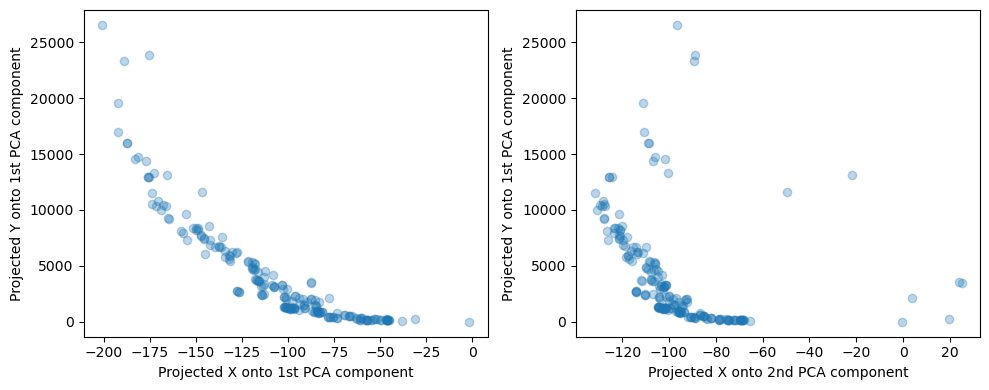

In [238]:
y = Y_test.dot(y_pca.components_[0])
x0 = X_test.dot(x_pca.components_[0])
x1 = X_test.dot(x_pca.components_[1])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

axes[0].scatter(x0, y, alpha=0.3)
axes[0].set(xlabel="Projected X onto 1st PCA component", ylabel="Projected Y onto 1st PCA component")

axes[1].scatter(x1, y, alpha=0.3)
axes[1].set(xlabel="Projected X onto 2nd PCA component", ylabel="Projected Y onto 1st PCA component")

plt.tight_layout()
plt.show()

In [239]:
# Alternative way to extract the 1st PCA component,
# the other being the dot product performed earlier.
y_pca.transform(Y_test).T[0].shape

(200,)

In [261]:
# seed 1244 as test was responsible for the worst R^2.
def train_test_seed_split(X, Y, seed=1244):
    X_train = X[X["Semente"] != seed]
    Y_train = Y[Y["Semente"] != seed]

    X_test = X[X["Semente"] == seed]
    Y_test = Y[Y["Semente"] == seed]

    # "N.", "Semente": Não são relevantes para regressão.
    X_train = X_train.drop(["N.", "Semente"], axis=1)
    Y_train = Y_train.drop(["N.", "Semente"], axis=1)
    X_test = X_test.drop(["N.", "Semente"], axis=1)
    Y_test = Y_test.drop(["N.", "Semente"], axis=1)

    return [X_train, X_test, Y_train, Y_test]

In [286]:
def PCR(n_components=None):
    return make_pipeline(StandardScaler(), PCA(n_components=n_components), LinearRegression())

In [287]:
def PLSR(n_components=2):
    return make_pipeline(StandardScaler(), PLSRegression(n_components=n_components))

In [296]:
r2s = []

# n = 13
for n in range(1, 15):
    # Semente
    # 1241    200
    # 1242    200
    # 1243    200
    # 1244    200
    # 1245    200
    for seed in range(1241, 1246):
        # X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=rng)
        X_train, X_test, Y_train, Y_test = train_test_seed_split(X, Y, seed)

        pcr = PCR(n_components=n)
        pcr.fit(X_train, Y_train)
        pca_step: PCA = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

        y_pca = PCR(n_components=min(n, 5))
        y_pca.fit(Y_train, Y_train)
        y_pca_step: PCA = y_pca.named_steps["pca"]

        pls = PLSR(n_components=n)
        pls.fit(X_train, Y_train)
        pls_step: PLSRegression = pls.named_steps["plsregression"]

        x_test_pca = X_test.dot(pca_step.components_[0])
        y_test_pca = Y_test.dot(y_pca_step.components_[0])
        Y_pred_pca = pcr.predict(X_test)
        y_pred_pca = Y_pred_pca.dot(y_pca_step.components_[0])

        r2_pcr = pcr.score(X_test, Y_test)
        r2_pls = pls.score(X_test, Y_test)

        r2s.append({"n": n, "seed": seed, "algo": "PCA", "r2": r2_pcr})
        r2s.append({"n": n, "seed": seed, "algo": "PLS", "r2": r2_pls})

        # TODO: avoid aggregation outside pandas!
        # if seed == 1245:
        #     # mean values over all seeds
        #     mean_r2_pcr = np.mean([r2["r2"] for r2 in r2s if r2["n"] == n and r2["algo"] == "PCA"])
        #     mean_r2_pls = np.mean([r2["r2"] for r2 in r2s if r2["n"] == n and r2["algo"] == "PLS"])
        #     r2s.append({"n": n, "seed": 0, "algo": "PCA", "r2": mean_r2_pcr})
        #     r2s.append({"n": n, "seed": 0, "algo": "PLS", "r2": mean_r2_pls})
        # print(f"\ntest seed: {seed}")
        # print(f"PCR r-squared {r2_pcr:.3f}")
        # print(f"PLS r-squared {r2_pls:.3f}")

        # fig, axes = plt.subplots(1, 2, figsize=(10, 3))
        # axes[0].scatter(x_test_pca, y_test_pca, alpha=0.3,
        #                 label="ground truth")
        # axes[0].scatter(x_test_pca, y_pred_pca, alpha=0.3,
        #                 label="predictions")
        # axes[0].set(
        #     xlabel="Projected X onto 1st PCA component",
        #     ylabel="Projected Y onto 1st PCA component",
        #     title="PCR / PCA"
        # )
        # axes[0].legend()

        # x_test_pls = X_test.dot(pls_step.x_weights_.T[0])
        # y_test_pls = Y_test.dot(pls_step.y_weights_.T[0])
        # Y_pred_pls = pls.predict(X_test)
        # y_pred_pls = Y_pred_pls.dot(pls_step.y_weights_.T[0])

        # axes[1].scatter(x_test_pls, y_test_pls, alpha=0.3,
        #                 label="ground truth")
        # axes[1].scatter(x_test_pls, y_pred_pls, alpha=0.3,
        #                 label="predictions")
        # axes[1].set(xlabel="Projected X onto 1st PLS component",
        #             ylabel="Projected Y onto 1st PLS component",
        #             title="PLS")
        # axes[1].legend()

        # plt.tight_layout()
        # plt.show()

r2s_df = pd.DataFrame(r2s)

seed        r2
n  algo                  
1  PCA   1243.0  0.261472
   PLS   1243.0  0.378316
2  PCA   1243.0  0.260664
   PLS   1243.0  0.564285
3  PCA   1243.0  0.425197
   PLS   1243.0  0.617447
4  PCA   1243.0  0.317943
   PLS   1243.0  0.659893
5  PCA   1243.0  0.572768
   PLS   1243.0  0.683275
6  PCA   1243.0  0.665251
   PLS   1243.0  0.630518
7  PCA   1243.0  0.693748
   PLS   1243.0  0.664568
8  PCA   1243.0  0.692025
   PLS   1243.0  0.660207
9  PCA   1243.0  0.612898
   PLS   1243.0  0.668236
10 PCA   1243.0  0.634584
   PLS   1243.0  0.664674
11 PCA   1243.0  0.677064
   PLS   1243.0  0.661150
12 PCA   1243.0  0.672063
   PLS   1243.0  0.658928
13 PCA   1243.0  0.659770
   PLS   1243.0  0.651121
14 PCA   1243.0  0.649752
   PLS   1243.0  0.649752

In [306]:
r2s_df.groupby(["n", "algo"]).describe()

seed                                                              r2  \
        count    mean       std     min     25%     50%     75%     max count   
n  algo                                                                         
1  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
2  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
3  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
4  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
5  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
6  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
7  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
8  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
9  PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
10 PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
11 PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
12 PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
13 PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
14 PCA    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   
   PLS    5.0  1243.0  1.581139  1241.0  1242.0  1243.0  1244.0  1245.0   5.0   

                                                                               
             mean       std       min       25%       50%       75%       max  
n  algo                                                                        
1  PCA   0.261472  0.039820  0.201613  0.242335  0.273546  0.292945  0.296923  
   PLS   0.378316  0.130869  0.161462  0.357662  0.421942  0.461910  0.488602  
2  PCA   0.260664  0.233869 -0.144876  0.303920  0.305410  0.415752  0.423116  
   PLS   0.564285  0.066522  0.460493  0.548424  0.577395  0.597199  0.637913  
3  PCA   0.425197  0.112722  0.228645  0.431619  0.480536  0.491188  0.493997  
   PLS   0.617447  0.104754  0.448612  0.587676  0.662327  0.675987  0.712636  
4  PCA   0.317943  0.623213 -0.792745  0.542859  0.575634  0.578517  0.685450  
   PLS   0.659893  0.099216  0.499747  0.632689  0.697783  0.720776  0.748471  
5  PCA   0.572768  0.208308  0.215036  0.573038  0.650843  0.697085  0.727837  
   PLS   0.683275  0.097310  0.523620  0.659777  0.727417  0.742178  0.763382  
6  PCA   0.665251  0.066297  0.582316  0.603918  0.712247  0.713013  0.714763  
   PLS   0.630518  0.241279  0.204892  0.671194  0.740363  0.759592  0.776546  
7  PCA   0.693748  0.065846  0.606081  0.643186  0.722762  0.736208  0.760502  
   PLS   0.664568  0.184713  0.342869  0.697668  0.721698  0.750010  0.810598  
8  PCA   0.692025  0.071016  0.594397  0.642140  0.720442  0.740298  0.762846  
   PLS   0.660207  0.227186  0.262442  0.699696  0.735518

In [299]:
r2s_df[r2s_df["n"] <= 5].groupby(["seed", "algo"]).describe()

n                                            r2            \
          count mean       std  min  25%  50%  75%  max count      mean   
seed algo                                                                 
1241 PCA    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.481969   
     PLS    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.649189   
1242 PCA    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.450119   
     PLS    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.611579   
1243 PCA    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.463294   
     PLS    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.583889   
1244 PCA    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0 -0.040199   
     PLS    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.418787   
1245 PCA    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.482861   
     PLS    5.0  3.0  1.581139  1.0  2.0  3.0  4.0  5.0   5.0  0.639772   

                                                                       
                std       min       25%       50%       75%       max  
seed algo                                                              
1241 PCA   0.146415  0.273546  0.415752  0.491188  0.578517  0.650843  
     PLS   0.108828  0.488602  0.597199  0.675987  0.720776  0.763382  
1242 PCA   0.188173  0.242335  0.303920  0.431619  0.575634  0.697085  
     PLS   0.125873  0.421942  0.548424  0.662327  0.697783  0.727417  
1243 PCA   0.109505  0.296923  0.423116  0.480536  0.542859  0.573038  
     PLS   0.075954  0.461910  0.577395  0.587676  0.632689  0.659777  
1244 PCA   0.454337 -0.792745 -0.144876  0.215036  0.228645  0.292945  
     PLS   0.146960  0.161462  0.448612  0.460493  0.499747  0.523620  
1245 PCA   0.230092  0.201613  0.305410  0.493997  0.685450  0.727837  
     PLS   0.163708  0.357662  0.637913  0.712636  0.742178  0.748471

In [300]:
X_train, X_test, Y_train, Y_test = train_test_seed_split(X, Y)

n = 5

pcr = PCR(n_components=n)
pcr.fit(X_train, Y_train)
pca_step: PCA = pcr.named_steps["pca"]  # retrieve the PCA step of the pipeline

y_pca = PCR(n_components=min(n, 5))
y_pca.fit(Y_train, Y_train)
y_pca_step: PCA = y_pca.named_steps["pca"]

pls = PLSR(n_components=n)
pls.fit(X_train, Y_train)
pls_step: PLSRegression = pls.named_steps["plsregression"]

x_test_pca = X_test.dot(pca_step.components_[0])
y_test_pca = Y_test.dot(y_pca_step.components_[0])
Y_pred_pca = pcr.predict(X_test)
y_pred_pca = Y_pred_pca.dot(y_pca_step.components_[0])

In [301]:
print(f"PCR r-squared {pcr.score(X_train, Y_train):.3f}")
print(f"PLS r-squared {pls.score(X_train, Y_train):.3f}")

PCR r-squared 0.693
PLS r-squared 0.812


In [302]:
print(f"PCR r-squared {pcr.score(X_test, Y_test):.3f}")
print(f"PLS r-squared {pls.score(X_test, Y_test):.3f}")

# (approximate values, vary on refresh due to train_test_split())
# 1 component:
# PCR r-squared 0.385
# PLS r-squared 0.532

# 2 components:
# PCR r-squared 0.432
# PLS r-squared 0.660

# 3 components:
# PCR r-squared 0.540
# PLS r-squared 0.750

# 4 components:
# PCR r-squared 0.605
# PLS r-squared 0.769

# 5 components (PLS's max):
# PCR r-squared 0.718
# PLS r-squared 0.783

# 6 components?
# It will only throw an error if using PLSCanonical, not
# PLSRegression.
# PCR r-squared 0.759
# PLS r-squared 0.809


PCR r-squared 0.215
PLS r-squared 0.524


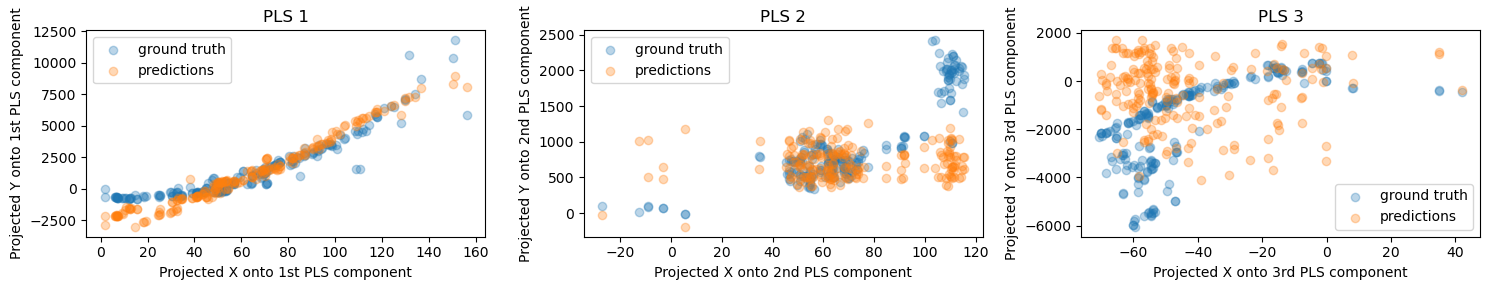

In [265]:
x_test_pls0 = x_test_pls
x_test_pls1 = X_test.dot(pls_step.x_weights_.T[1])
x_test_pls2 = X_test.dot(pls_step.x_weights_.T[2])
# x_test_pls3 = X_test.dot(pls_step.x_weights_.T[3])
# x_test_pls4 = X_test.dot(pls_step.x_weights_.T[4])

y_test_pls0 = y_test_pls
y_test_pls1 = Y_test.dot(pls_step.y_weights_.T[1])
y_test_pls2 = Y_test.dot(pls_step.y_weights_.T[2])
# y_test_pls3 = Y_test.dot(pls_step.y_weights_.T[3])
# y_test_pls4 = Y_test.dot(pls_step.y_weights_.T[4])

y_pred_pls0 = y_pred_pls
y_pred_pls1 = Y_pred_pls.dot(pls_step.y_weights_.T[1])
y_pred_pls2 = Y_pred_pls.dot(pls_step.y_weights_.T[2])
# y_pred_pls3 = Y_pred_pls.dot(pls_step.y_weights_.T[3])
# y_pred_pls4 = Y_pred_pls.dot(pls_step.y_weights_.T[4])

fig, axes = plt.subplots(1, 3, figsize=(15, 3))
axes[0].scatter(x_test_pls0, y_test_pls0, alpha=0.3,
                label="ground truth")
axes[0].scatter(x_test_pls0, y_pred_pls0, alpha=0.3,
                label="predictions")
axes[0].set(xlabel="Projected X onto 1st PLS component",
            ylabel="Projected Y onto 1st PLS component",
            title="PLS 1")
axes[0].legend()

axes[1].scatter(x_test_pls1, y_test_pls1, alpha=0.3,
                label="ground truth")
axes[1].scatter(x_test_pls1, y_pred_pls1, alpha=0.3,
                label="predictions")
axes[1].set(xlabel="Projected X onto 2nd PLS component",
            ylabel="Projected Y onto 2nd PLS component",
            title="PLS 2")
axes[1].legend()

axes[2].scatter(x_test_pls2, y_test_pls2, alpha=0.3,
                label="ground truth")
axes[2].scatter(x_test_pls2, y_pred_pls2, alpha=0.3,
                label="predictions")
axes[2].set(xlabel="Projected X onto 3rd PLS component",
            ylabel="Projected Y onto 3rd PLS component",
            title="PLS 3")
axes[2].legend()

plt.tight_layout()
plt.show()

In [266]:
r2_score(y_test_pls0, y_pred_pls0)


0.815695970972559

In [267]:
y_test_pls01 = Y_test.dot(pls_step.y_weights_.T[:2].T)
y_pred_pls01 = Y_pred_pls.dot(pls_step.y_weights_.T[:2].T)

y_test_pls02 = Y_test.dot(pls_step.y_weights_.T[:3].T)
y_pred_pls02 = Y_pred_pls.dot(pls_step.y_weights_.T[:3].T)

y_test_pls03 = Y_test.dot(pls_step.y_weights_.T[:-1].T)
y_pred_pls03 = Y_pred_pls.dot(pls_step.y_weights_.T[:-1].T)

y_test_pls04 = Y_test.dot(pls_step.y_weights_)
y_pred_pls04 = Y_pred_pls.dot(pls_step.y_weights_)

r2_score(y_test_pls01, y_pred_pls01), \
r2_score(y_test_pls02, y_pred_pls02), \
r2_score(y_test_pls03, y_pred_pls03), \
r2_score(y_test_pls04, y_pred_pls04)

(-0.7860906048179782,
 -0.9763821154763764,
 -1.0114932236160668,
 -1.0095991505350521)

In [248]:
Y_train_pred = pls.predict(X_train)

r2_score(Y_train.dot(pls_step.y_weights_.T[0]), Y_train_pred.dot(pls_step.y_weights_.T[0]))


0.9125363268592799

In [249]:
y_pca_step.components_[0]

array([ 0.41610276, -0.3873918 , -0.47092267,  0.48067495,  0.47325417])

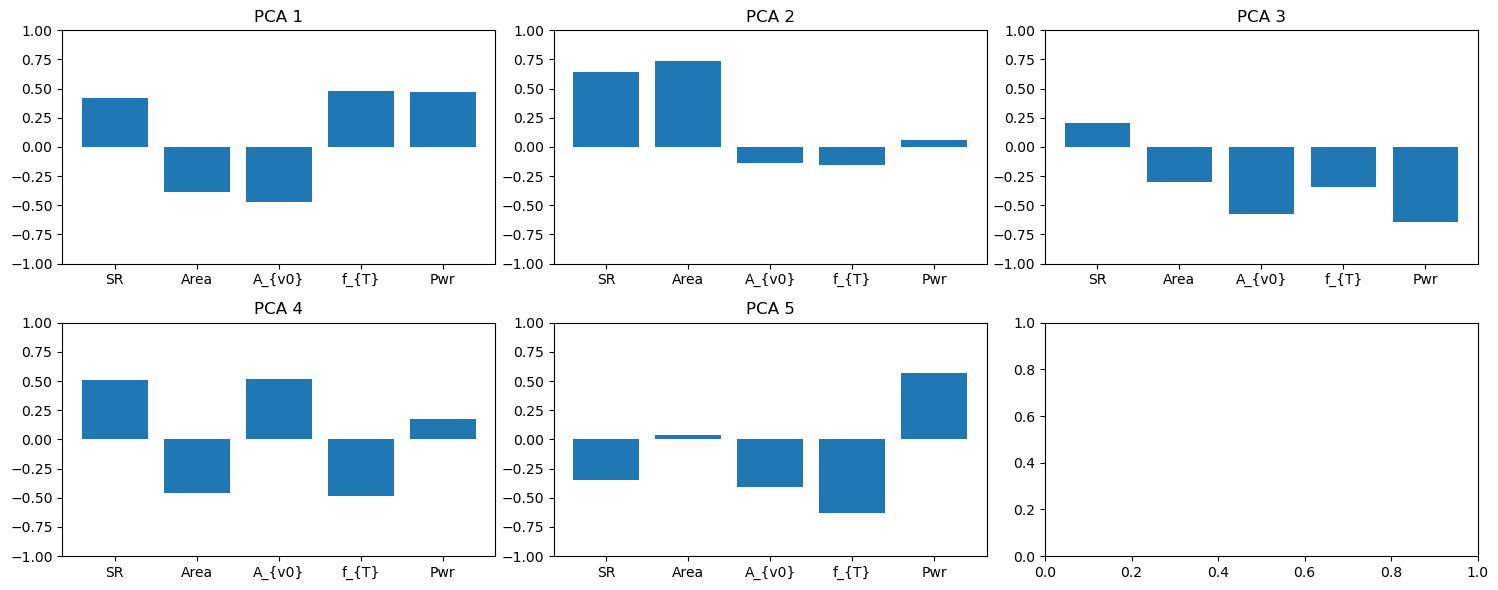

In [251]:
targets = Y_test.columns.to_numpy()

fig, axes = plt.subplots(2, 3, figsize=(15, 6))
axes[0, 0].bar(targets, y_pca_step.components_[0])
axes[0, 0].set_ylim((-1, 1))
axes[0, 0].set(title="PCA 1")

axes[0, 1].bar(targets, y_pca_step.components_[1])
axes[0, 1].set_ylim((-1, 1))
axes[0, 1].set(title="PCA 2")

axes[0, 2].bar(targets, y_pca_step.components_[2])
axes[0, 2].set_ylim((-1, 1))
axes[0, 2].set(title="PCA 3")

axes[1, 0].bar(targets, y_pca_step.components_[3])
axes[1, 0].set_ylim((-1, 1))
axes[1, 0].set(title="PCA 4")

axes[1, 1].bar(targets, y_pca_step.components_[4])
axes[1, 1].set_ylim((-1, 1))
axes[1, 1].set(title="PCA 5")

plt.tight_layout()
plt.show()

In [252]:
pls_step.x_weights_.T[0].shape

(14,)

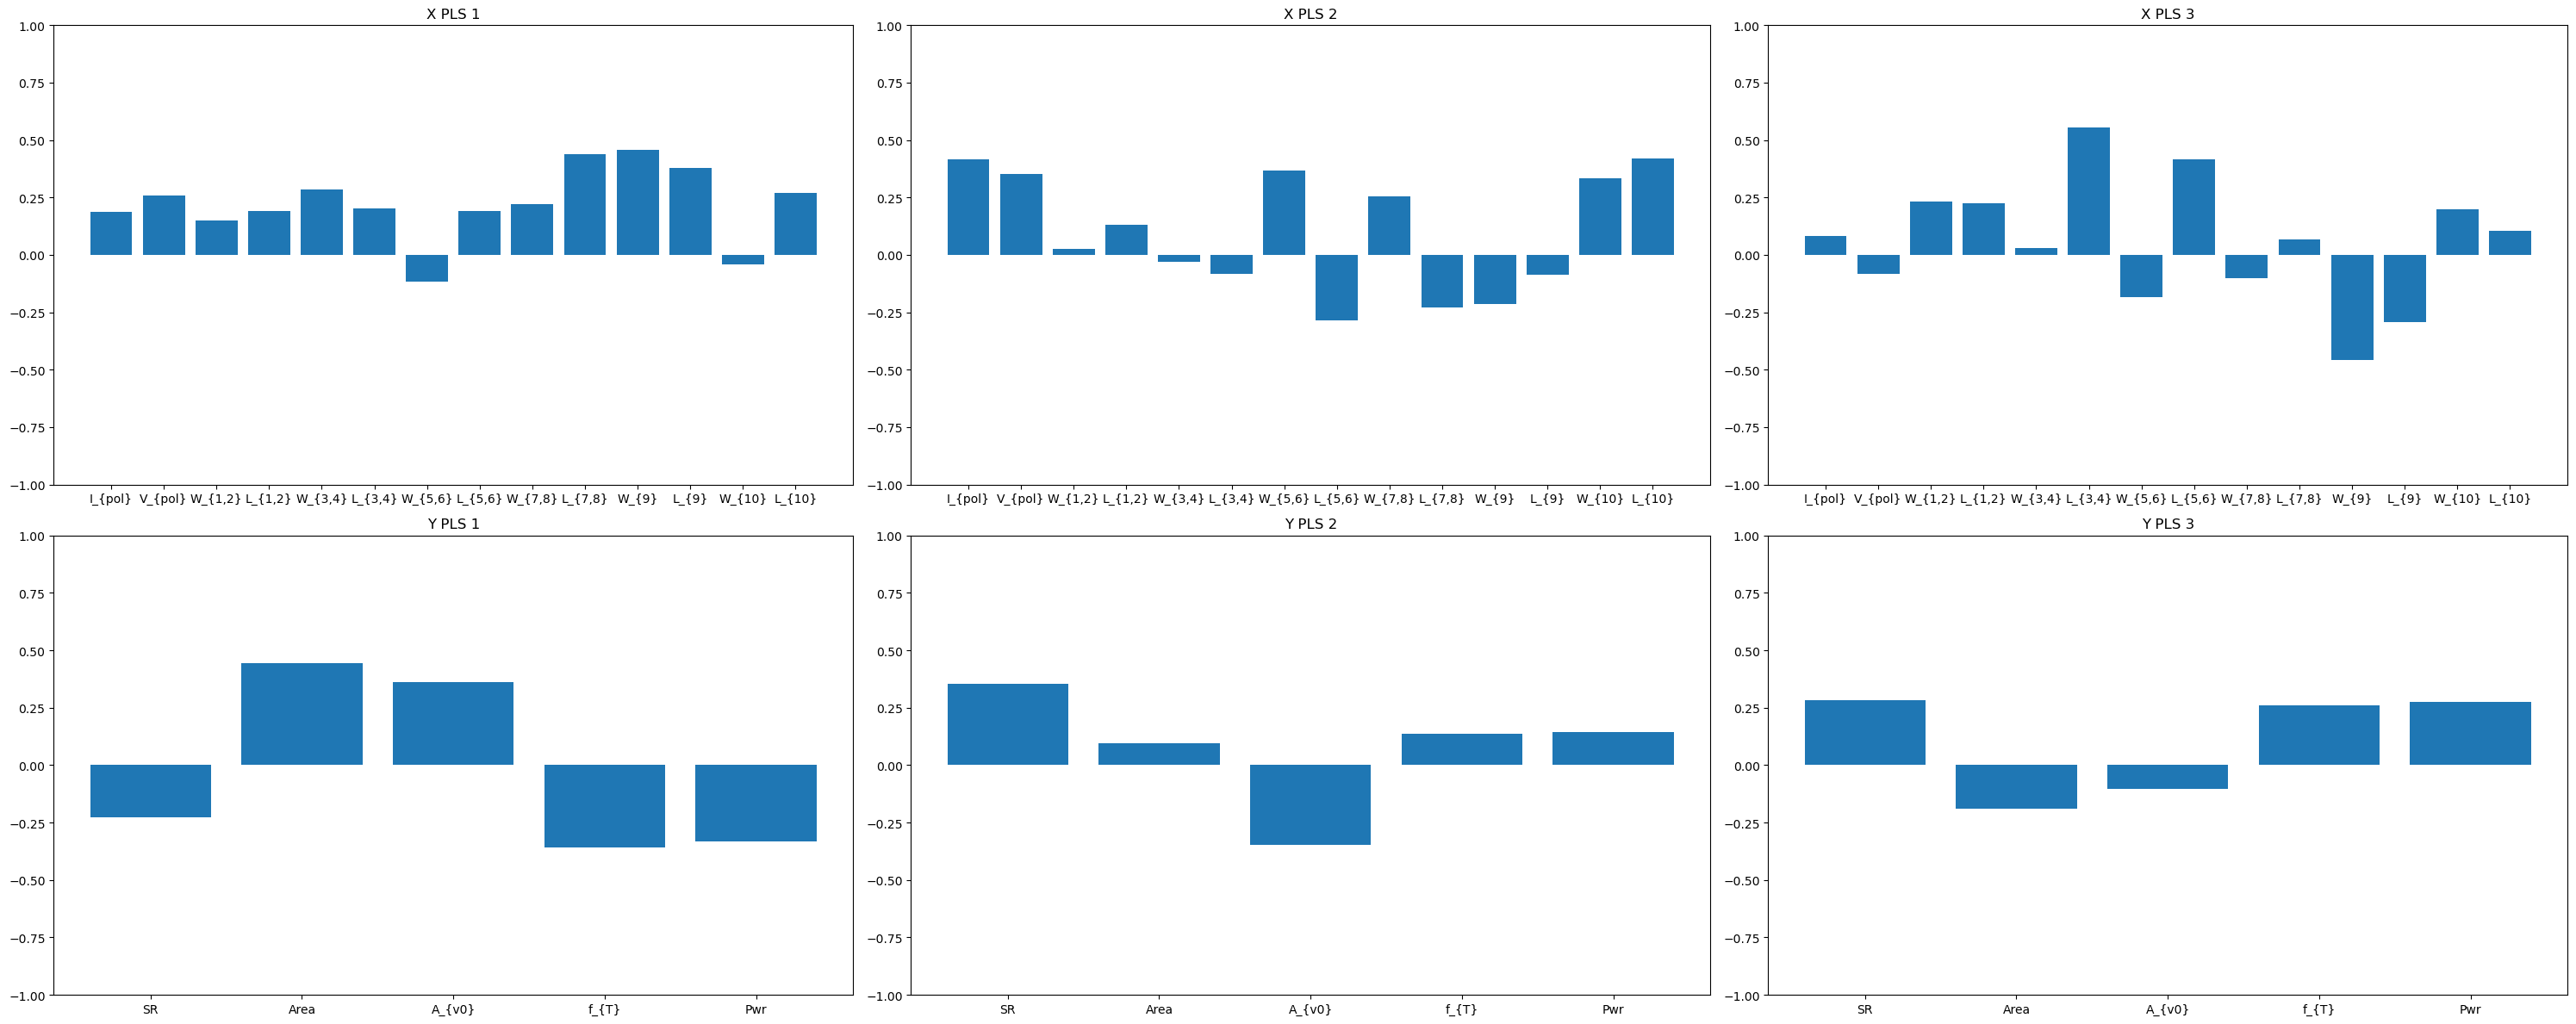

In [254]:
descriptors = X_test.columns.to_numpy()

fig, axes = plt.subplots(2, 3, figsize=(30, 12))
axes[0, 0].bar(descriptors, pls_step.x_weights_.T[0])
axes[0, 0].set_ylim((-1, 1))
axes[0, 0].set(title="X PLS 1")

axes[0, 1].bar(descriptors, pls_step.x_weights_.T[1])
axes[0, 1].set_ylim((-1, 1))
axes[0, 1].set(title="X PLS 2")

axes[0, 2].bar(descriptors, pls_step.x_weights_.T[2])
axes[0, 2].set_ylim((-1, 1))
axes[0, 2].set(title="X PLS 3")

axes[1, 0].bar(targets, pls_step.y_weights_.T[0])
axes[1, 0].set_ylim((-1, 1))
axes[1, 0].set(title="Y PLS 1")

axes[1, 1].bar(targets, pls_step.y_weights_.T[1])
axes[1, 1].set_ylim((-1, 1))
axes[1, 1].set(title="Y PLS 2")

axes[1, 2].bar(targets, pls_step.y_weights_.T[2])
axes[1, 2].set_ylim((-1, 1))
axes[1, 2].set(title="Y PLS 3")

plt.tight_layout()
plt.show()

In [ ]:
np.argmax(Y_test)